# Machine Learning Lab 5 - Predicting Breast Cancer - II

Submitted By <br/>
Name: **Jortin Paul** <br/>
Register Number: **19112010** <br/>
Class: **5 BSc Data Science** <br/>

<hr/>

## 1. Lab Overview

#### Objectives
- To Predict the Breast Cancer
- To Compare and Contrast the Differences in Classification Result among Decision Trees and Random Forests
- To Demonstrate various evaluation metrices 
- To Check the effect of classification with respect to change in train-test dataset, classification parameters, hyper   
  parameters

#### Problem Definition
As all the ML libraries were installed and verified, and also with the exprience in Exploratory Data Analysis that has got during previous lab session we can move forward to new machine algorithm like Decision Trees and Random Forests concept.
To achieve the objectives such as analyse,and predict the breast cancer we can use python and the libraries such as pandas,matplotlib,seaborn and sklearn.

#### Approach
The Breast Cancer data which is already provided can be analysed using python through jupyter notebook with the libraries that are already intsalled.A statistical approach has been used to find the hidden features and predict the cancer.

Using pandas to import the Dataset and visualizations can be done through matplotlib,seaborn libraries and for Decision Trees and Random Forest use sklearn libraries

#### Sections
1. Lab Overview
1. Theoretical Background
   1. Decision Trees
   1. Random Forest
1. Data Overview
1. Exploratory Data Analysis
   1. Import Libraries
   1. Load the Data
   1. Understand the Data
   1. Discriptive Statistics
1. Splitting, Tarining  & Testing
   1. Random Forest
   1. Decison Tree
1. After Preprocessing
   1. Random Forest
   1. Decision Tree
1. Hyperparameters
1. Evalutaion on Different Test Size, Random States
1. Conclusion
1. Future Enhancement

#### References
1. https://www.javatpoint.com/machine-learning-random-forest-algorithm
1. https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm


<hr/>

## 2. Theoretical Background

### A. Decision Trees
- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.
- It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
- In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
- Structre of Decision Tree:
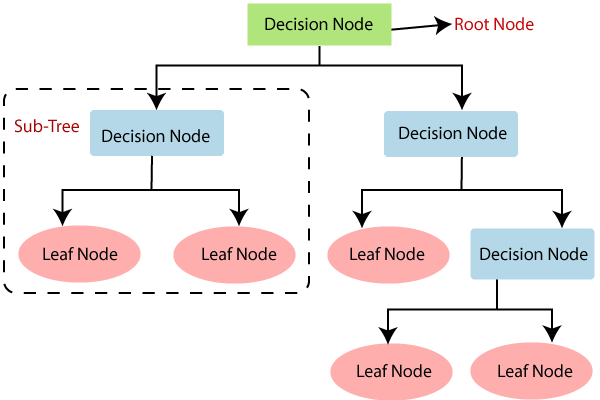

### B. Random Forests
- Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique.
- It can be used for both Classification and Regression problems in ML. 
- It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
- Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." 
- Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
- **The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting**.
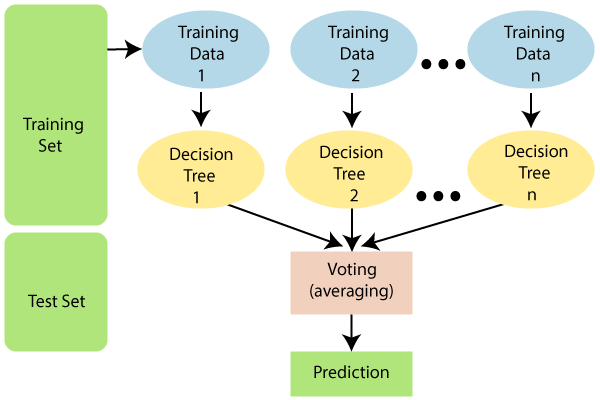

### 3. Data Overview
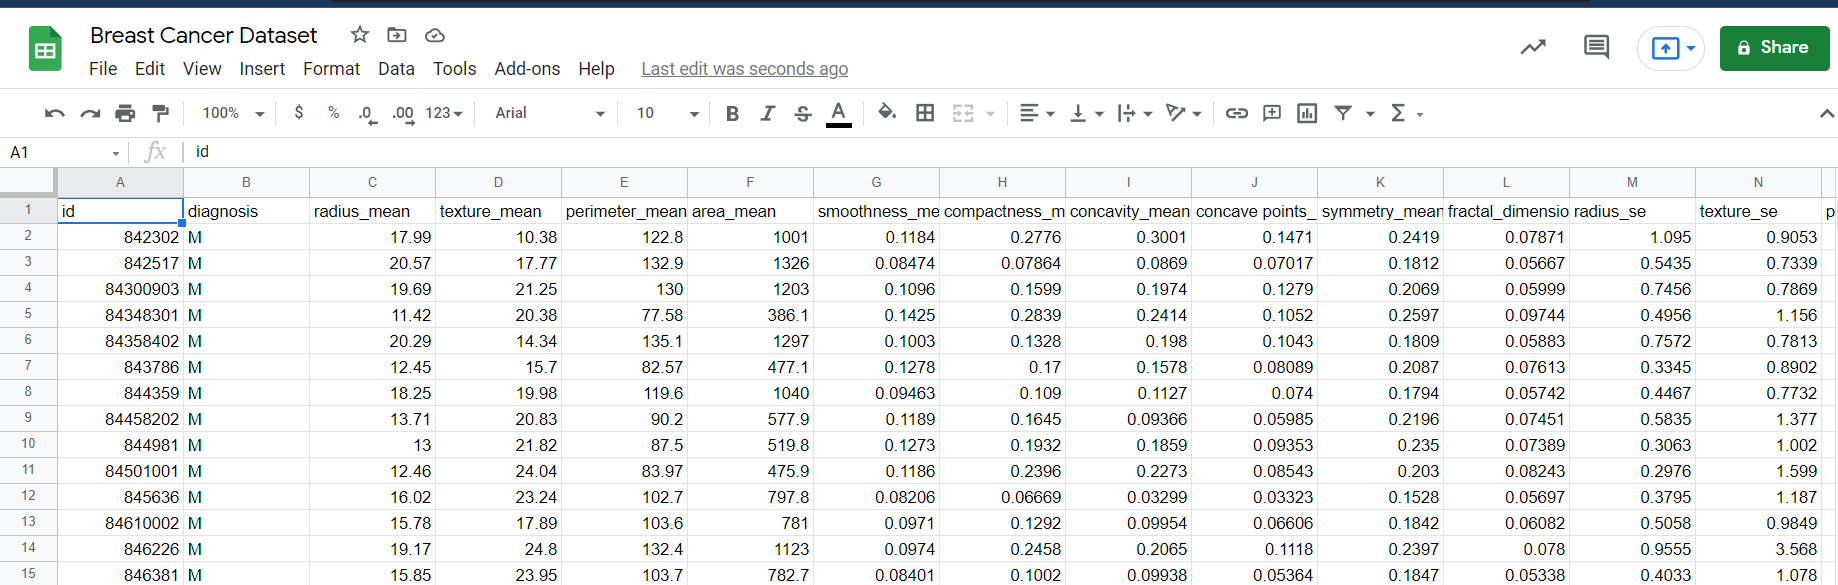
**Breast Cancer Dataset** is a dataset of size **122 kb** that contains data of **569** people that has breast cancer

The dataset has 33 attributes that gives information of cancer such as:
- ID number
- Diagnosis (M = malignant, B = benign)
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

## 4. Exploratory Data Analysis

### A. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### B. Load the Data

In [2]:
# Assigning the data set a dataframe
df= pd.read_csv('C:/Users/JORTIN PAUL/Documents/PROJECTS/SEM 5/Machine Learning/Lab 5/Breast Cancer Dataset.csv')

### C. Understand the Data

In [3]:
# Print first 5 rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Print last 5 rows of the dataframe
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
# Shape of the dataframe
df.shape

(569, 33)

we have 569 rows and 33 columns

In [6]:
# Summary of dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Columns of the dataframe
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
# Check for null values for Data Cleaning
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# delete the Column that has Null Values
df.drop('Unnamed: 32', axis = 1, inplace = True)
df.drop('id', axis = 1, inplace = True)

<AxesSubplot:>

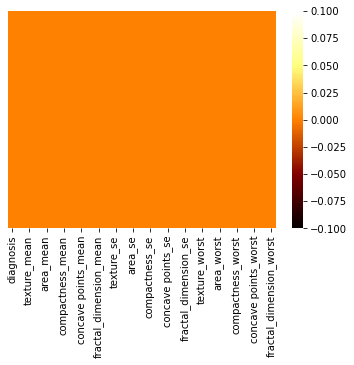

In [10]:
# Checking for null values graphicaly
sns.heatmap(df.isnull(),yticklabels=False,cmap='afmhot')

As we don't have any null values in our data set we can proceed with the Analysis

In [11]:
# Statistical summary of the dataframe
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Unique values of each columns
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

### D. Descriptive Statistics

#### Correlation

In [13]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

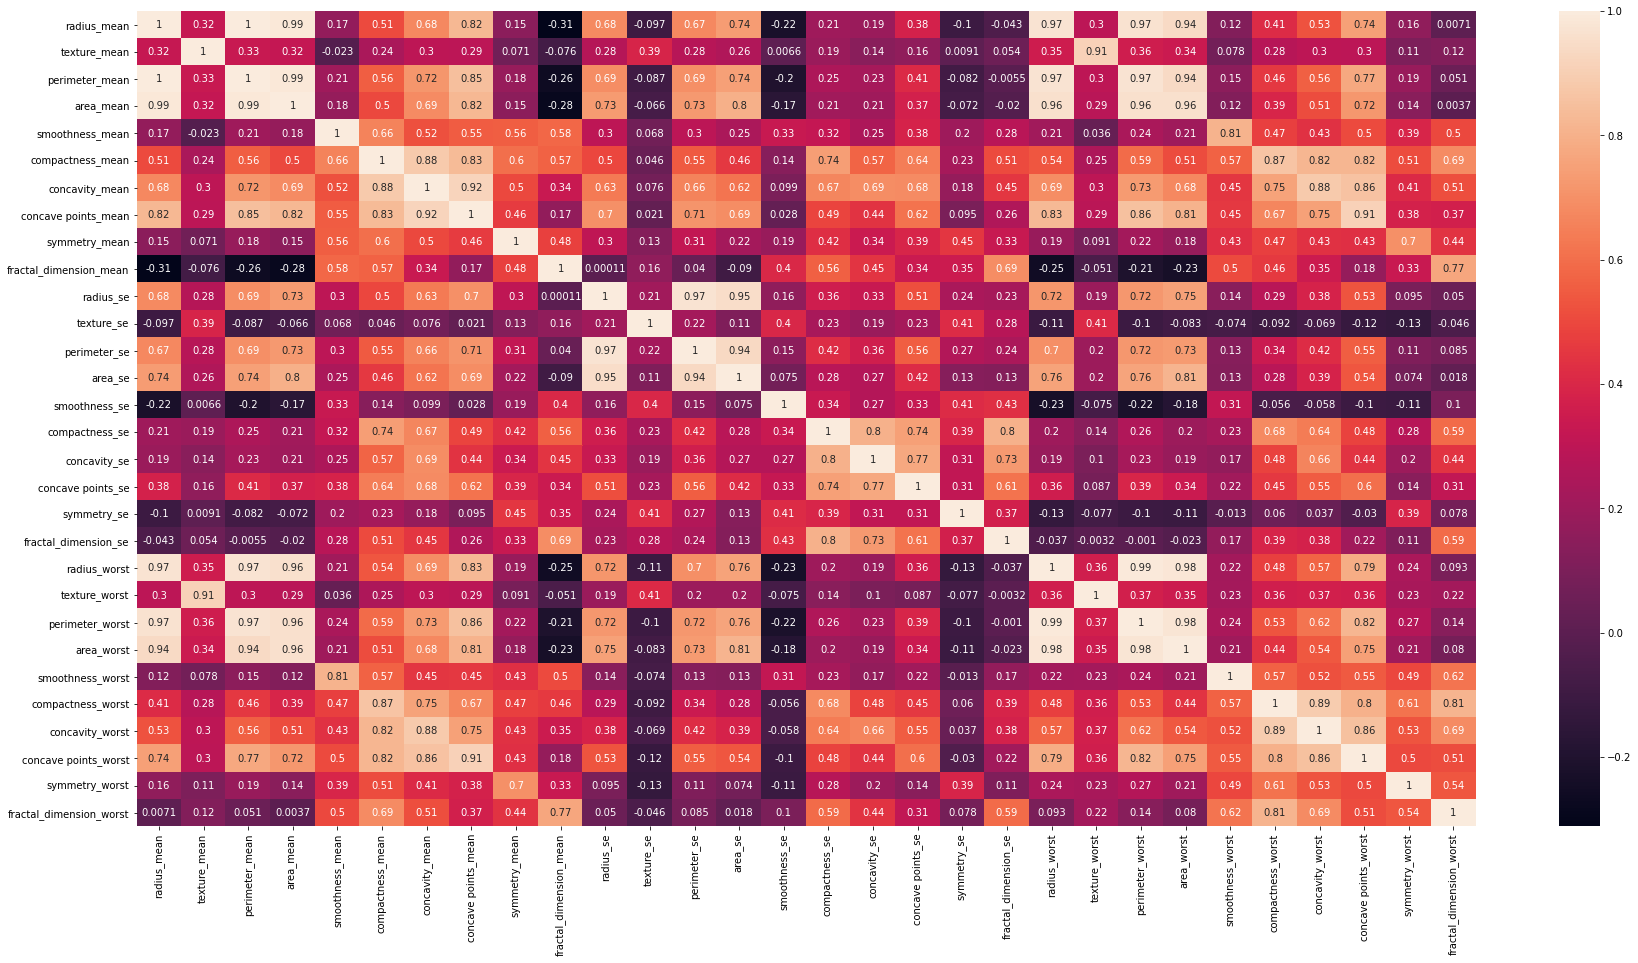

In [14]:
plt.figure(figsize = (30, 15))
sns.heatmap(df.corr(),annot=True)

#### Ditribution of Data

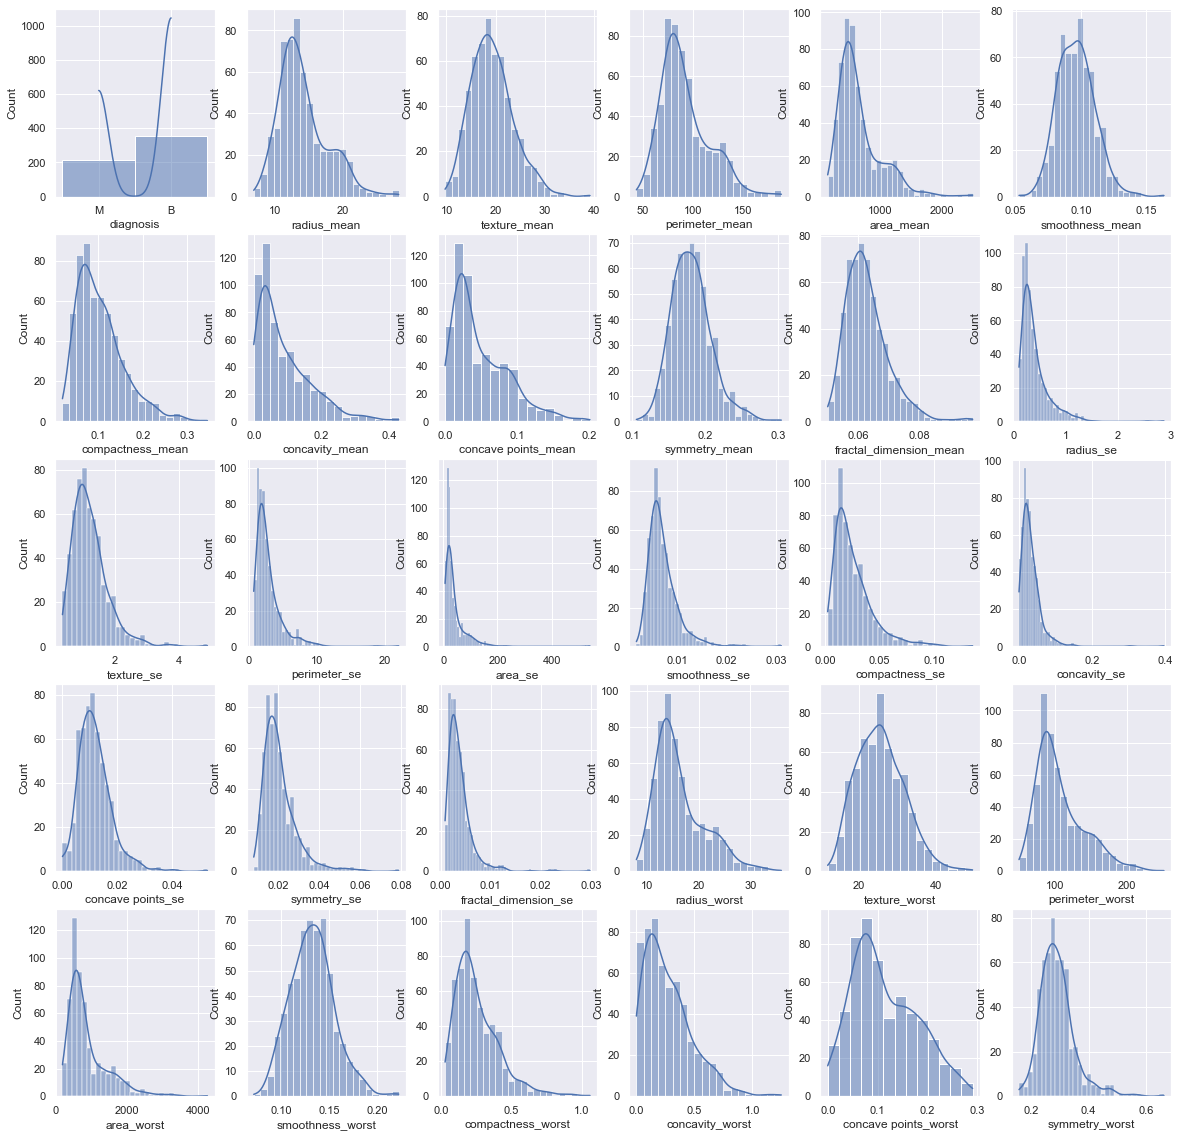

In [15]:
plt.figure(figsize = (20, 20))
sns.set(style="darkgrid")
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
plt.show()

#### Diagnosis

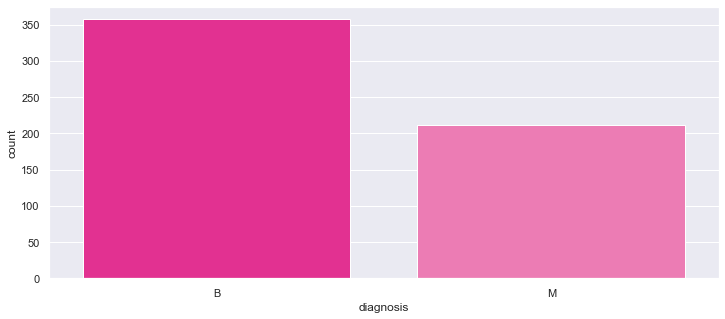

In [16]:
plt.figure(figsize = (12, 5))
sns.countplot(df['diagnosis'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(df['diagnosis']).iloc[:17].index)
plt.show()

- B:Benign
- M:Malignant

In [17]:
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0
    
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

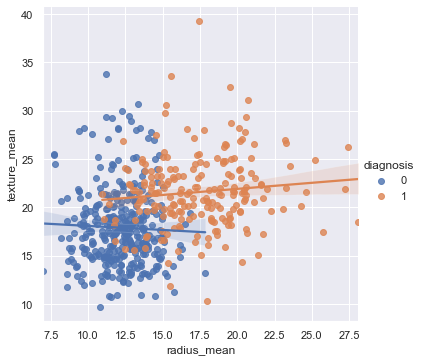

In [18]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

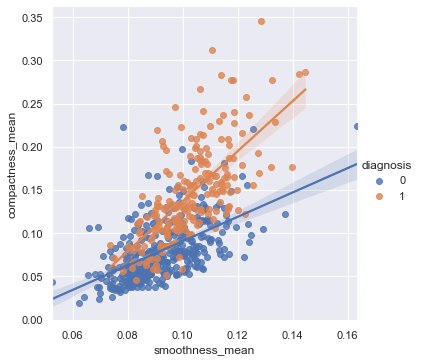

In [19]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', 
           data = df, hue = 'diagnosis')

## 5. Splitting,Training & Testing

In [20]:
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state =42)

### A. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(max_depth=2, random_state=0)
rf2.fit(X_train,Y_train)
pred3=rf2.predict(X_test)
accuracy_score(pred3,Y_test)

0.9649122807017544

<AxesSubplot:>

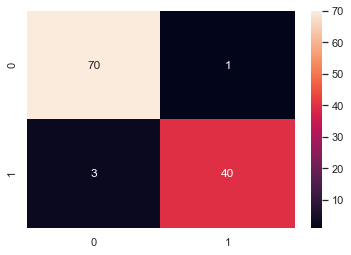

In [23]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,pred3)
dataframe_conf_matrix = conf_matrix
sns.heatmap(dataframe_conf_matrix, annot=True)

In [24]:
# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(Y_test, pred3)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### B. Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
d2=DecisionTreeClassifier()
d2.fit(X_train,Y_train)
pred4=d2.predict(X_test)
accuracy_score(pred4,Y_test)

0.9473684210526315

<AxesSubplot:>

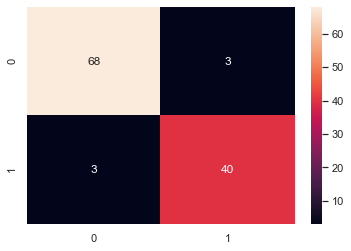

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,pred4)
dataframe_conf_matrix = conf_matrix
sns.heatmap(dataframe_conf_matrix, annot=True)

In [27]:
# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(Y_test, pred4)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## 6. After Preporcessing

In [29]:
p=df.drop('diagnosis',axis=1)
q=df['diagnosis']

In [30]:
#giving log transformation for values with high variance
for i in p.columns.tolist():
    if p[i].var()>5:
        p[i]=np.log(p[i])
        print(i)        

radius_mean
texture_mean
perimeter_mean
area_mean
area_se
radius_worst
texture_worst
perimeter_worst
area_worst


In [31]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(p,q,test_size=0.2,random_state =42)

### A. Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth=2)
rf1.fit(a_train,b_train)
p1=rf1.predict(a_test)
accuracy_score(p1,b_test)

0.9649122807017544

### B. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
d1=DecisionTreeClassifier()
d1.fit(a_train,b_train)
p2=d1.predict(a_test)
accuracy_score(p2,b_test)

0.9385964912280702

## 7. Hyperparameter

In [34]:
def doRF(X, y, test_size = 0.20, randomstate = 8,c='gini',mf='auto' ):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = test_size, random_state =randomstate)
    cls1 = RandomForestClassifier(criterion=c,max_features=mf,random_state=0)
    cls1.fit(X_train,Y_train)
    pred1=cls1.predict(X_test)
    acc_score1=accuracy_score(pred1,Y_test)
    return acc_score1

In [35]:
def doDC(X, y, test_size = 0.20, randomstate = 8,c='gini',mf='auto'):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = test_size, random_state =randomstate)
    cls2=DecisionTreeClassifier(criterion=c,max_features=mf)
    cls2.fit(X_train,Y_train)
    pred2=cls2.predict(X_test)
    acc_score2 = accuracy_score(pred2,Y_test)
    return acc_score2

In [36]:
#Creating lists of different hyperparameters and evaluations metrics
test_size = [0.30, 0.25, 0.20,0.10]
random_states = [8, 27, 42]
criterions=['gini', 'entropy']
maxfeatures=['auto', 'sqrt', 'log2']

In [37]:
df3 = pd.DataFrame(columns = ['Test Size', 'Random States','Random Forest Accuracy','Criterions','Max features'])
df4 = pd.DataFrame(columns = ['Test Size', 'Random States','Decision Tree Accuracy','Criterions','Max features'])

In [38]:
#Random Forest

for t_size in test_size:
    for r_state in random_states:
        for crs in criterions:
            for mfs in maxfeatures:
                     
                a2 = doRF(p, q, t_size, r_state,crs,mfs)
                I2 = {} 
                I2['Test Size'] = t_size
                I2['Random States'] = r_state
                I2['Random Forest Accuracy'] = a2
                I2['Criterions'] = crs
                I2['Max features'] = mfs

                df3 = df3.append(I2, ignore_index = True)
                                      

In [39]:
df3

,Test Size,Random States,Random Forest Accuracy,Criterions,Max features
0,0.3,8,0.959064,gini,auto
1,0.3,8,0.959064,gini,sqrt
2,0.3,8,0.959064,gini,log2
3,0.3,8,0.970760,entropy,auto
4,0.3,8,0.970760,entropy,sqrt
...,...,...,...,...,...
67,0.1,42,0.964912,gini,sqrt
68,0.1,42,0.964912,gini,log2
69,0.1,42,0.964912,entropy,auto
70,0.1,42,0.964912,entropy,sqrt


Text(0, 0.5, 'Accuracy')

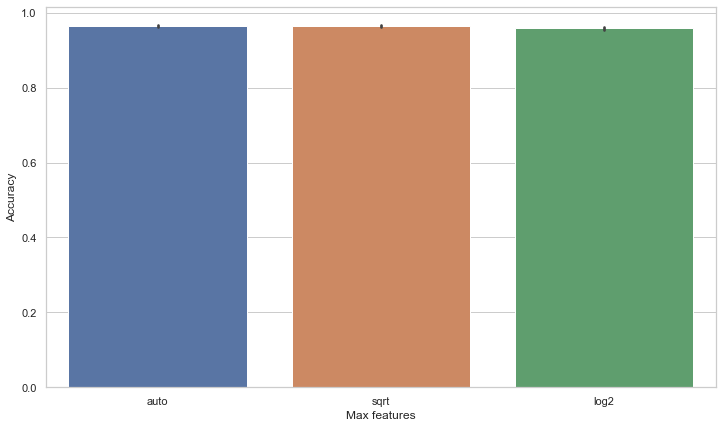

In [40]:
plt.figure(figsize = (12,7))
sns.set(style = "whitegrid")
f = sns.barplot(x = "Max features", y = "Random Forest Accuracy", data = df3)
f.set_xlabel("Max features")
f.set_ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

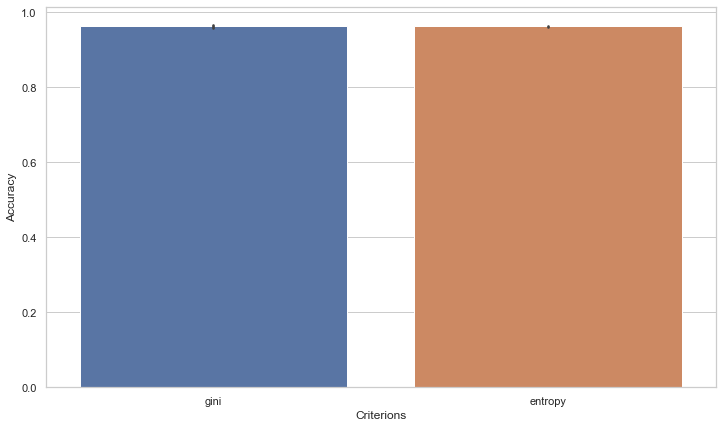

In [41]:
plt.figure(figsize = (12,7))
sns.set(style = "whitegrid")
f = sns.barplot(x = "Criterions", y = "Random Forest Accuracy", data = df3)
f.set_xlabel("Criterions")
f.set_ylabel("Accuracy")

In [42]:
#Decision Tree

for t_size in test_size:
    for r_state in random_states:
        for crs in criterions:
            for mfs in maxfeatures:
                     
                a1 = doDC(p, q, t_size, r_state,crs,mfs)
                I2 = {} 
                I2['Test Size'] = t_size
                I2['Random States'] = r_state
                I2['Decision Tree Accuracy'] = a1
                I2['Criterions'] = crs
                I2['Max features'] = mfs

                df4 = df4.append(I2, ignore_index = True)
                                      

In [43]:
df4

,Test Size,Random States,Decision Tree Accuracy,Criterions,Max features
0,0.3,8,0.918129,gini,auto
1,0.3,8,0.953216,gini,sqrt
2,0.3,8,0.929825,gini,log2
3,0.3,8,0.935673,entropy,auto
4,0.3,8,0.929825,entropy,sqrt
...,...,...,...,...,...
67,0.1,42,0.947368,gini,sqrt
68,0.1,42,0.824561,gini,log2
69,0.1,42,0.947368,entropy,auto
70,0.1,42,0.964912,entropy,sqrt


Text(0, 0.5, 'Accuracy')

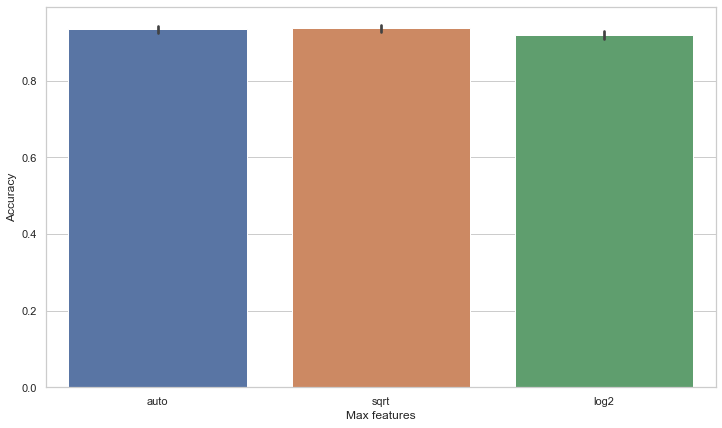

In [44]:
plt.figure(figsize = (12,7))
sns.set(style = "whitegrid")
f = sns.barplot(x = "Max features", y = "Decision Tree Accuracy", data = df4)
f.set_xlabel("Max features")
f.set_ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

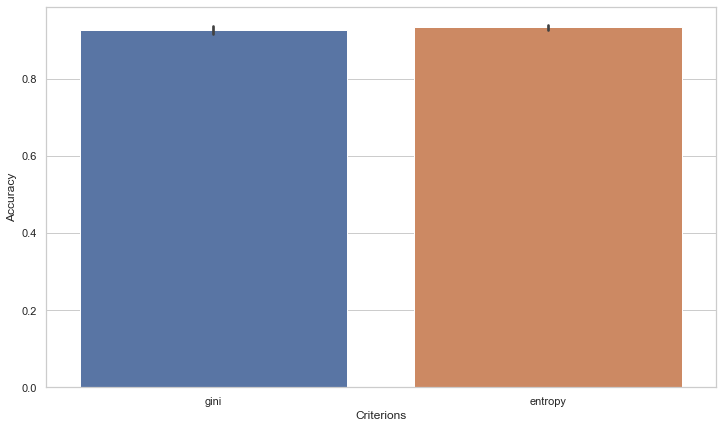

In [45]:
plt.figure(figsize = (12,7))
sns.set(style = "whitegrid")
f = sns.barplot(x = "Criterions", y = "Decision Tree Accuracy", data = df4)
f.set_xlabel("Criterions")
f.set_ylabel("Accuracy")

## 8. Evalutaion on Different Test Size, Random States

In [46]:
df5 = pd.DataFrame(columns = ['Test Size', 'Random States','Decision Tree Accuracy','Random Forest Accuracy'])
for t_size in test_size:
    for r_state in random_states:
        a1 = doRF(p, q, t_size, r_state)
        a2 = doDC(p, q, t_size, r_state)
        I = {} 
        I['Test Size'] = t_size
        I['Random States'] = r_state
        I['Decision Tree Accuracy'] = a2
        I['Random Forest Accuracy'] = a1

        df5 = df5.append(I, ignore_index = True)
    

In [47]:
df5

,Test Size,Random States,Decision Tree Accuracy,Random Forest Accuracy
0,0.30,8.0,0.906433,0.959064
1,0.30,27.0,0.941520,0.970760
2,0.30,42.0,0.947368,0.970760
3,0.25,8.0,0.916084,0.958042
4,0.25,27.0,0.916084,0.958042
5,0.25,42.0,0.916084,0.972028
6,0.20,8.0,0.929825,0.973684
7,0.20,27.0,0.912281,0.973684
8,0.20,42.0,0.964912,0.964912
9,0.10,8.0,0.947368,0.947368


<AxesSubplot:xlabel='Test Size'>

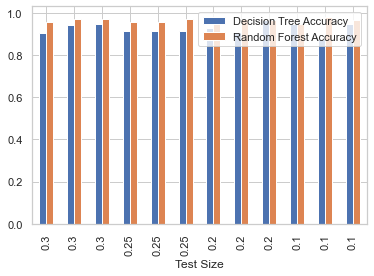

In [48]:
df5.plot(x="Test Size", y=['Decision Tree Accuracy','Random Forest Accuracy'], kind="bar")

## 9. Conclusion

- Before Preprocessing
   - The dataset gave 94.73% accuracy with Decision Tree Algorithm
   - The dataset gave 96.49% accuracy with Random Forest Algorithm
- After Preprocessing
   - The dataset gave 93.85% accuracy with Decision Tree Algorithm
   - The dataset gave 96.49% accuracy with Random Forest Algorithm
- Random Forest classifer gave more accuracies than Decision Tree Classifier

Through the Predicting Breast Cancer lab,we could know more regarding the Decision Tree Classifier and Random Forest and how to use it in a real life sitauation and also got exposure on how to do evaluation Metrices.

Finally could understand which algorithm is good under which random state and test size for this situation.

## 10. Future Enhancement

Could Enhance the Lab session using more Visulization 